In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (20, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Prem_data=  pd.read_csv("/Users/hishammohamedabdelaal/Desktop/Ahmed Stuff/Big Data Programming/jupyter/EPL 1990-2022 Dataset/results.csv" , encoding = 'unicode_escape') 

In [2]:
Prem_data.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
Prem_data.tail()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0
11112,2021-22,2022-04-10T16:30:00Z,Man City,Liverpool,2,2,D,2.0,1.0,H,...,5.0,4.0,4.0,1.0,9.0,11.0,1.0,4.0,0.0,0.0


FTHG : Full time home goals.
FTAG : Full time away goals.
FTR : Full time Result.
HTHG : Half time home goals.
HTAG : Half time home goals.
HTR : Half time home goals.
HS : Home team shots.
AS : Away team shots.
HST : Home team shots on target.
AST : Away team shots on target.
HC : Home team corners.
AC : Away team corners.
HF : Home team Fouls.
AF : Away team Fouls.
HY : Home team yellow cards.
AY : Away team yellow cards.
HR : Home team red cards.
AR : Away team red cards.

In [4]:
#some Columns hae null values so we need to remove them in order to clean the dataset a bit 

Prem_data = Prem_data.drop(range(0,(2824)), axis =0)
pd.isna(Prem_data).sum()

Season      0
DateTime    0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HC          0
AC          0
HF          0
AF          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [5]:
#after Cleaning our dataset this is how it looks
Prem_data.tail()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0
11112,2021-22,2022-04-10T16:30:00Z,Man City,Liverpool,2,2,D,2.0,1.0,H,...,5.0,4.0,4.0,1.0,9.0,11.0,1.0,4.0,0.0,0.0


In [6]:
#extract the month and day using .month and .day attributes of DateTime ojects. 
# remove the DateTime column 
Prem_data['Month'] = pd.DatetimeIndex(Prem_data['DateTime']).month
Prem_data['Day'] = pd.DatetimeIndex(Prem_data['DateTime']).day
Prem_data = Prem_data.drop('DateTime', axis= 1)
Prem_data.tail()


,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HC,AC,HF,AF,HY,AY,HR,AR,Month,Day
11108,2021-22,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,G Scott,...,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0,4,9
11109,2021-22,Brentford,West Ham,2,0,H,0.0,0.0,D,M Atkinson,...,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0,4,10
11110,2021-22,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,R Jones,...,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0,4,10
11111,2021-22,Norwich,Burnley,2,0,H,1.0,0.0,H,M Oliver,...,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0,4,10
11112,2021-22,Man City,Liverpool,2,2,D,2.0,1.0,H,A Taylor,...,4.0,1.0,9.0,11.0,1.0,4.0,0.0,0.0,4,10


In [7]:
#After cleaning the Data we Start by combining the Years stats together 
Prem_by_Season = Prem_data.groupby(["Season"]).sum()
#This will show the accumelated stats of fevery column in each year this willl help us in the visulaization proccess 
Prem_by_Season

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,Month,Day
Season,,,,,,,,,,,,,,,,,,
2000-01,587,405,261.0,181.0,4861.0,3564.0,2342.0,1722.0,2390.0,1766.0,4932.0,5299.0,512.0,682.0,32.0,31.0,2615,6187
2001-02,557,444,257.0,195.0,4656.0,3505.0,2202.0,1655.0,2441.0,1757.0,4891.0,5221.0,479.0,686.0,32.0,40.0,2550,6214
2002-03,570,430,253.0,182.0,4876.0,3644.0,2605.0,1906.0,2516.0,1887.0,4791.0,4875.0,500.0,642.0,27.0,48.0,2627,6107
2003-04,572,440,262.0,198.0,4960.0,3848.0,2727.0,2048.0,2385.0,1853.0,4742.0,5051.0,481.0,600.0,20.0,38.0,2481,6335
2004-05,570,405,253.0,174.0,4819.0,3622.0,2591.0,1879.0,2309.0,1786.0,4730.0,5186.0,421.0,610.0,27.0,32.0,2566,5937
2005-06,555,389,272.0,170.0,4689.0,3504.0,2485.0,1769.0,2270.0,1781.0,4938.0,5060.0,499.0,674.0,27.0,49.0,2524,6018
2006-07,552,379,258.0,162.0,4906.0,3647.0,2526.0,1825.0,2420.0,1866.0,4686.0,4834.0,530.0,695.0,17.0,36.0,2664,6260
2007-08,581,421,244.0,171.0,4882.0,3901.0,2635.0,2111.0,2374.0,1828.0,4570.0,4696.0,511.0,705.0,31.0,30.0,2544,5832
2008-09,532,410,233.0,165.0,5187.0,4069.0,2842.0,2157.0,2374.0,1845.0,4300.0,4525.0,515.0,683.0,26.0,37.0,2607,6497


In [8]:
Prem_by_Season['Goals'] = Prem_by_Season['FTHG'] + Prem_by_Season['FTAG']
Prem_by_Season = Prem_by_Season.reset_index()


In [9]:
sns.color_palette()

sns.color_palette('plasma_r')

[(0.994495, 0.74088, 0.166335),
 (0.95547, 0.533093, 0.28549),
 (0.85975, 0.360588, 0.406917),
 (0.723444, 0.196158, 0.538981),
 (0.546157, 0.038954, 0.64701),
 (0.32515, 0.006915, 0.639512)]

Text(0, 0.5, 'Goals')

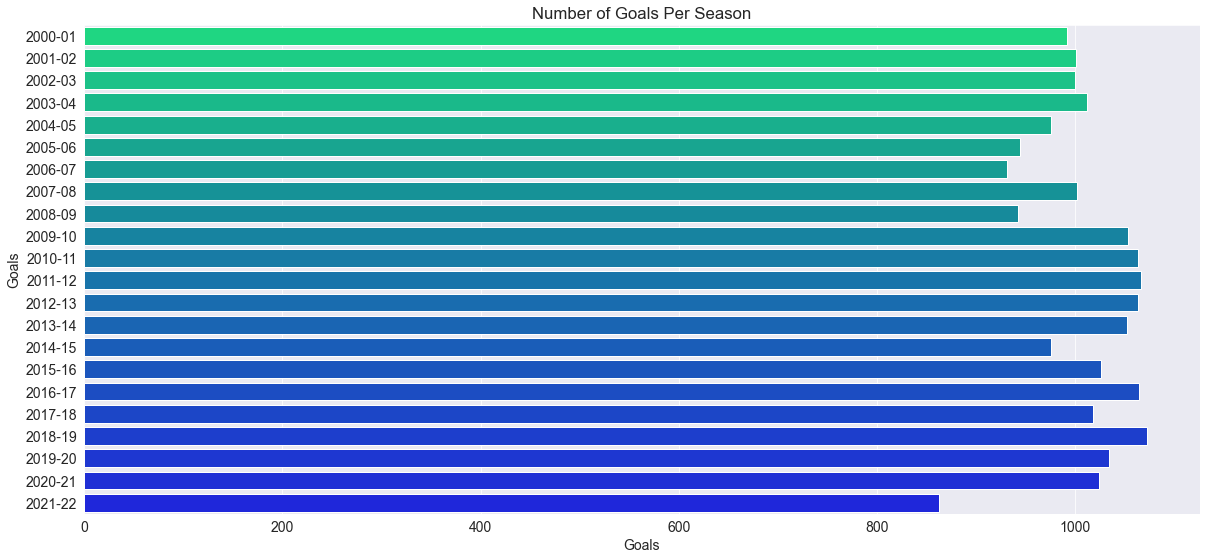

In [10]:
#First well compare the number of goals scored per season 
sns.barplot(x= 'Goals',y= 'Season',data = Prem_by_Season, palette='winter_r')
plt.title('Number of Goals Per Season') 
plt.ylabel('Goals')

Goals Scored Per Season Chart shows: 
Most Scored:  2018-2019
Least Scored: 2021-2022 as the Footballing Season Still Did not end (At time of creation)
Least Scored Finished: 2005-2006 

In [11]:
#before we can create a HeatMap graph we need to first set the data up to be eligible to work as a heat map.
#we use pivot in pandas that coverts data frame into a 2d matrix 
Prem_HeatMap = Prem_data.groupby(['Season','Month']).sum().reset_index()
Prem_HeatMap['Goals'] = Prem_HeatMap['FTHG'] + Prem_HeatMap['FTAG']
Final = Prem_HeatMap.pivot('Season','Month', 'Goals' )
Final

Month,1,2,3,4,5,6,7,8,9,10,11,12
Season,,,,,,,,,,,,
2000-01,92.0,62.0,70.0,133.0,84.0,NaN,NaN,87.0,130.0,84.0,102.0,148.0
2001-02,109.0,69.0,150.0,113.0,40.0,NaN,NaN,63.0,122.0,95.0,69.0,171.0
2002-03,108.0,89.0,75.0,146.0,64.0,NaN,NaN,85.0,110.0,76.0,114.0,133.0
2003-04,102.0,125.0,85.0,129.0,87.0,NaN,NaN,103.0,87.0,71.0,92.0,131.0
2004-05,101.0,98.0,45.0,131.0,81.0,NaN,NaN,114.0,57.0,101.0,118.0,129.0
2005-06,79.0,100.0,122.0,128.0,43.0,NaN,NaN,75.0,56.0,109.0,75.0,157.0
2006-07,116.0,73.0,65.0,138.0,52.0,NaN,NaN,71.0,69.0,79.0,90.0,178.0
2007-08,82.0,70.0,134.0,111.0,56.0,NaN,NaN,89.0,99.0,97.0,84.0,180.0
2008-09,84.0,53.0,84.0,113.0,96.0,NaN,NaN,79.0,85.0,103.0,120.0,125.0


Text(0.5, 1.0, 'Goals Distribution based on month')

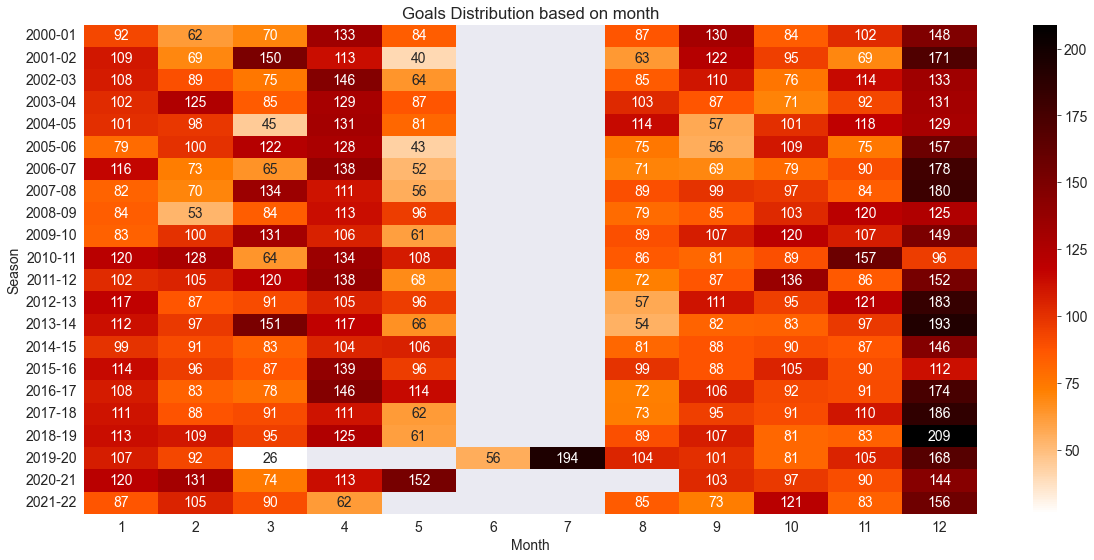

In [12]:
sns.heatmap(Final, annot = True, cmap = 'gist_heat_r',fmt='g')
plt.title('Goals Distribution based on month') 

In this HeatMap it shows how many goals were scored in each month for each season in the premier league months 6 and 7 were commonly thr offseason thus why there isnt many matches played there. The only exception was the 2019/2020 season there were Postponed Matches due to covid.

1- December in footballing season has the most goals Scored
2- Here Shows how seasons ended mostly in mid may so number of goals are lower than expected. 

In [13]:
#we will now look at Home And Away Goals. 
# we will visualies it similiarly to Goals scored in each season, but a sdouble barplot.
#First we make double barplot this is done by fucntion called melt to compare 2 voulmns ith each other 
Prem_H_A = Prem_by_Season[['Season', 'FTHG', 'FTAG']]
Prem_H_A = Prem_H_A.melt("Season",var_name="H/A",value_name="Goals")
Prem_H_A

,Season,H/A,Goals
0,2000-01,FTHG,587
1,2001-02,FTHG,557
2,2002-03,FTHG,570
3,2003-04,FTHG,572
4,2004-05,FTHG,570
5,2005-06,FTHG,555
6,2006-07,FTHG,552
7,2007-08,FTHG,581
8,2008-09,FTHG,532
9,2009-10,FTHG,645


Text(0, 0.5, 'Season')

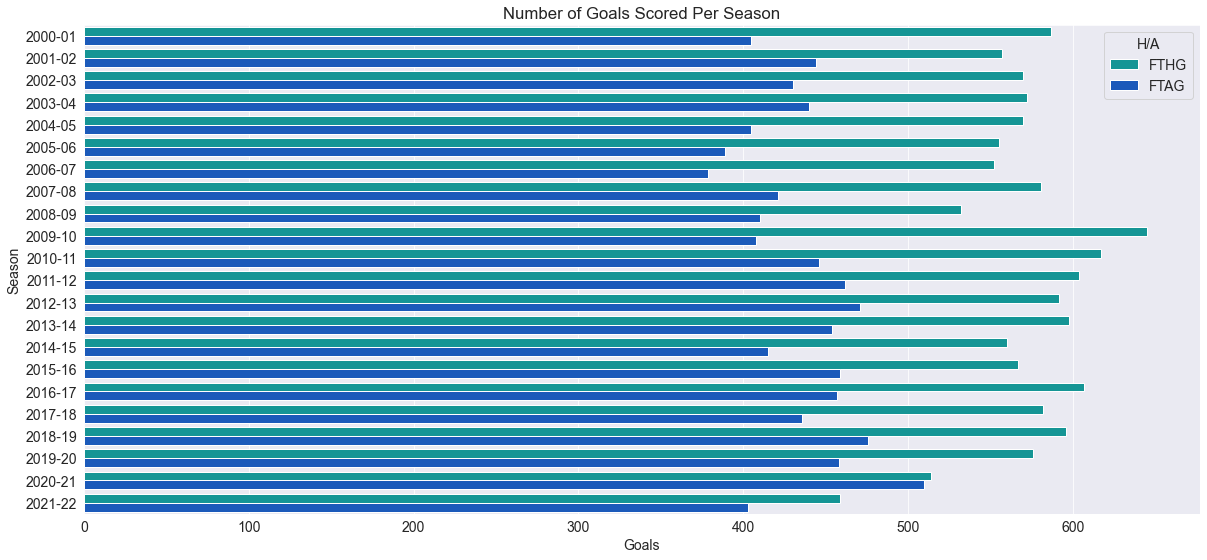

In [14]:

sns.barplot('Goals', 'Season', hue = 'H/A',data = Prem_H_A,palette='winter_r')
plt.title('Number of Goals Scored Per Season') 
plt.ylabel('Season')


1-This Barchart Shows that Home Goals are always more than Away Goals 

2-in the 2020/2021 Season Games were played without fans due to covid and that affected the goals scored in every H/A games as they are practically the same with a minor difference. 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

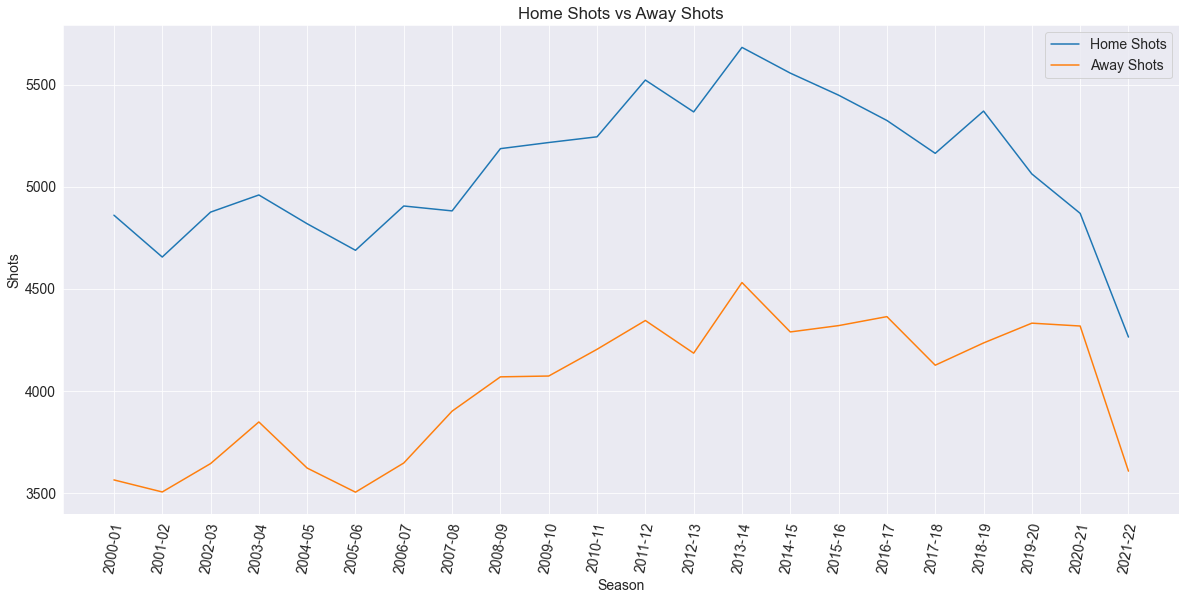

In [15]:
# we will now Show Stats about shooting and comapre them in H/A on Target and off Target. 
# well plot line graphs for this comaprison. 

sns.lineplot(Prem_by_Season.Season, Prem_by_Season.HS, data = Prem_by_Season)
sns.lineplot(Prem_by_Season.Season, Prem_by_Season.AS, data = Prem_by_Season)
plt.ylabel('Shots')
plt.legend(['Home Shots','Away Shots'])
plt.title('Home Shots vs Away Shots') 
plt.xticks(rotation=80)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

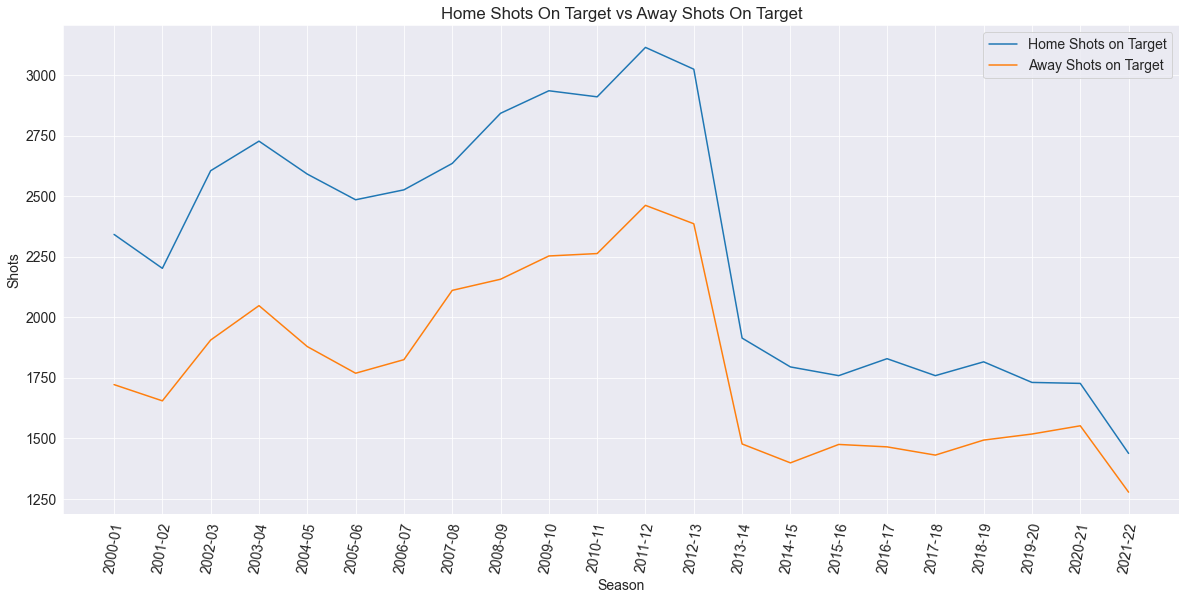

In [16]:
sns.lineplot(Prem_by_Season.Season, Prem_by_Season.HST, data = Prem_by_Season)
sns.lineplot(Prem_by_Season.Season, Prem_by_Season.AST, data = Prem_by_Season)
plt.legend(['Home Shots on Target','Away Shots on Target' ])
plt.ylabel('Shots')
plt.title('Home Shots On Target vs Away Shots On Target') 
plt.xticks(rotation=80)

in these line graphs we showed how much shots Were taken home and away in the seasons and how much SHots on target Home and away were also taken.

1- Shots on Target in Away games were signifcanlty less than Home Games.
2- Home Advantge shows how it affects the shooting as Home Teams shoot more for the Fans at their Home turf. 
3- Shots On target in both home and away started to decrease massivley starting from the 2012-2013 season, this can be caused from tactical evolution and how certain managers told players to shoot less and focus on passing. 


Now We will Focus On Team Statistics More.

well Create a Teams Column and create a Home And away team column to show further stats

In [17]:
Prem_H = Prem_data.groupby(Prem_data.HomeTeam)
Prem_A = Prem_data.groupby(Prem_data.AwayTeam)

#now we create Goals per Team 
Prem_TG = Prem_H['FTHG'].sum() + Prem_A['FTAG'].sum()
Prem_TG = Prem_TG.reset_index()
Prem_TG.rename( columns={0 :'Goals'}, inplace=True )
Prem_TG = Prem_TG.sort_values(['Goals'], ascending=False)

Text(0, 0.5, 'Team')

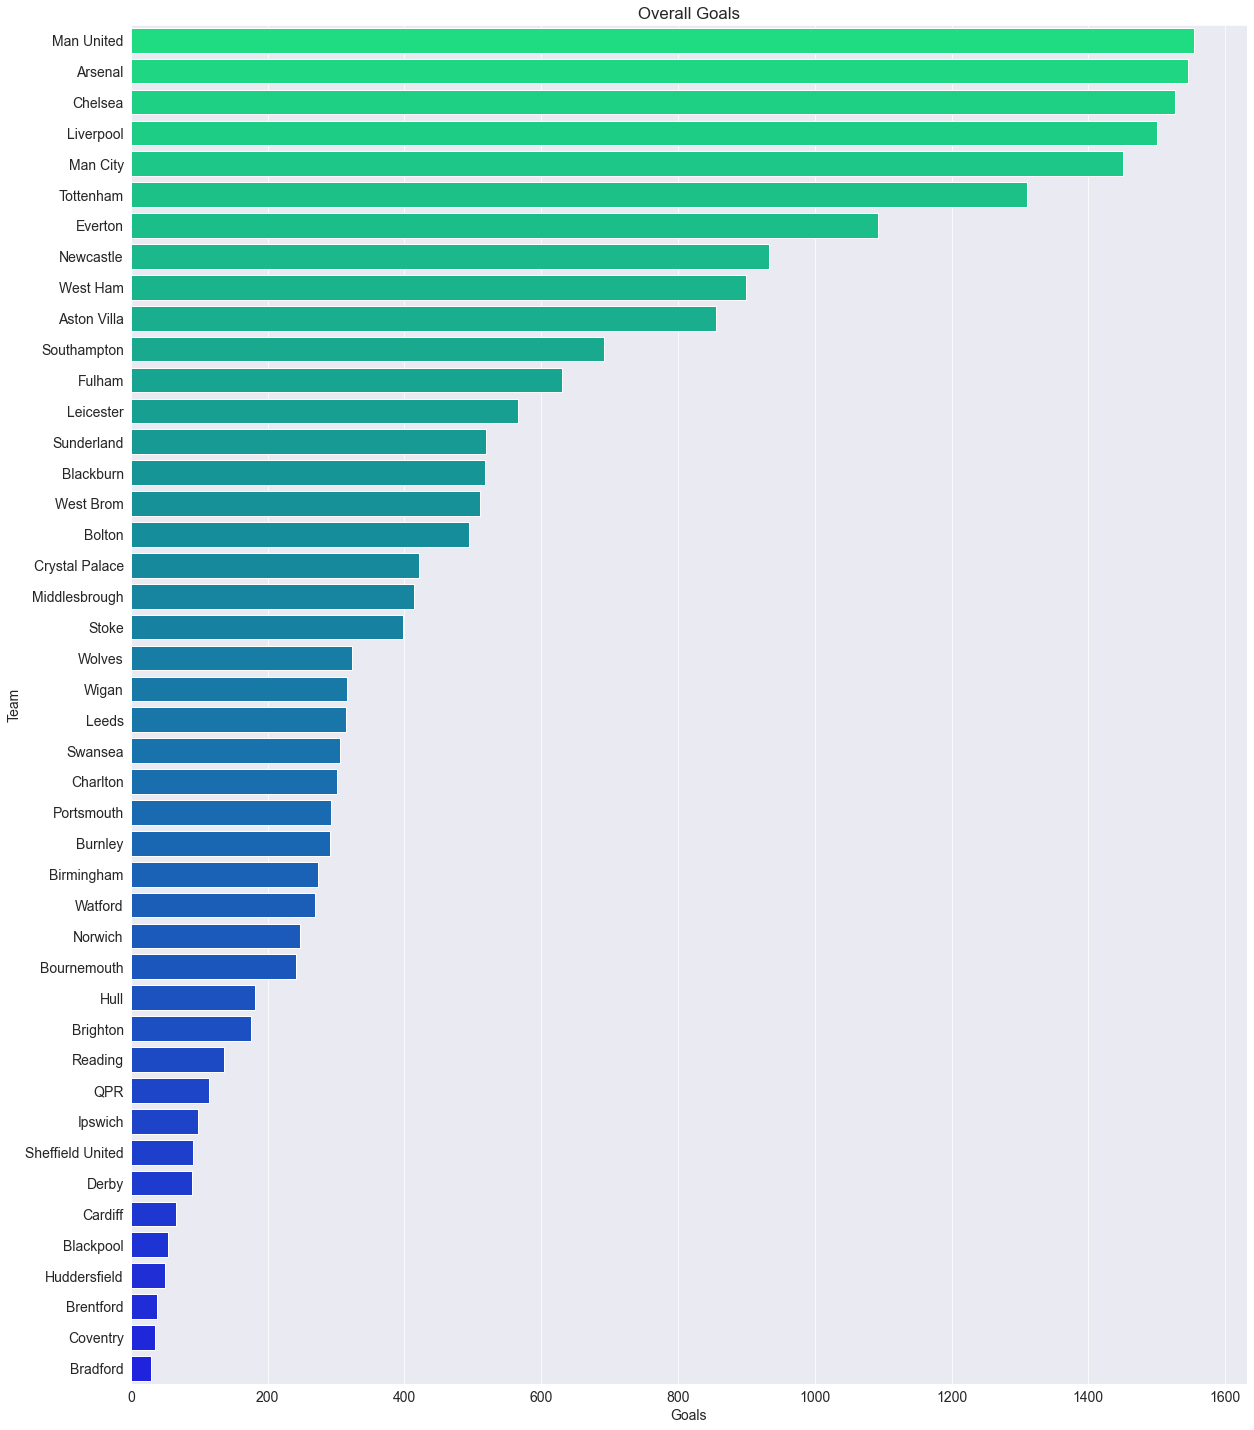

In [18]:
matplotlib.rcParams['figure.figsize'] = (20, 25)
sns.barplot("Goals",'HomeTeam', data = Prem_TG, palette= "winter_r")
plt.title('Overall Goals')
plt.ylabel('Team')

In [19]:
home_win=100*round((Prem_data.loc[Prem_data['FTR']=='H'].groupby('HomeTeam')['FTR'].count()/Prem_data.groupby('HomeTeam')['FTR'].count()),3)

home_win.sort_values(ascending = False)

HomeTeam
Man United          69.2
Arsenal             67.0
Chelsea             65.9
Liverpool           63.8
Man City            62.8
Tottenham           58.5
Everton             49.5
Ipswich             44.7
Newcastle           44.4
Leicester           42.9
Stoke               42.6
Fulham              42.1
West Ham            41.9
Blackburn           41.1
Portsmouth          40.6
Charlton            40.6
Reading             40.4
Leeds               39.6
Southampton         39.0
Bolton              38.8
Sheffield United    38.6
Swansea             38.3
Birmingham          37.6
Brentford           37.5
Middlesbrough       37.4
Wolves              36.9
Aston Villa         36.7
Bournemouth         35.8
Burnley             33.8
Crystal Palace      32.6
Wigan               31.6
Norwich             31.5
Watford             31.0
West Brom           30.8
Hull                30.5
Sunderland          30.5
Cardiff             28.9
Brighton            27.2
QPR                 26.3
Blackpool       

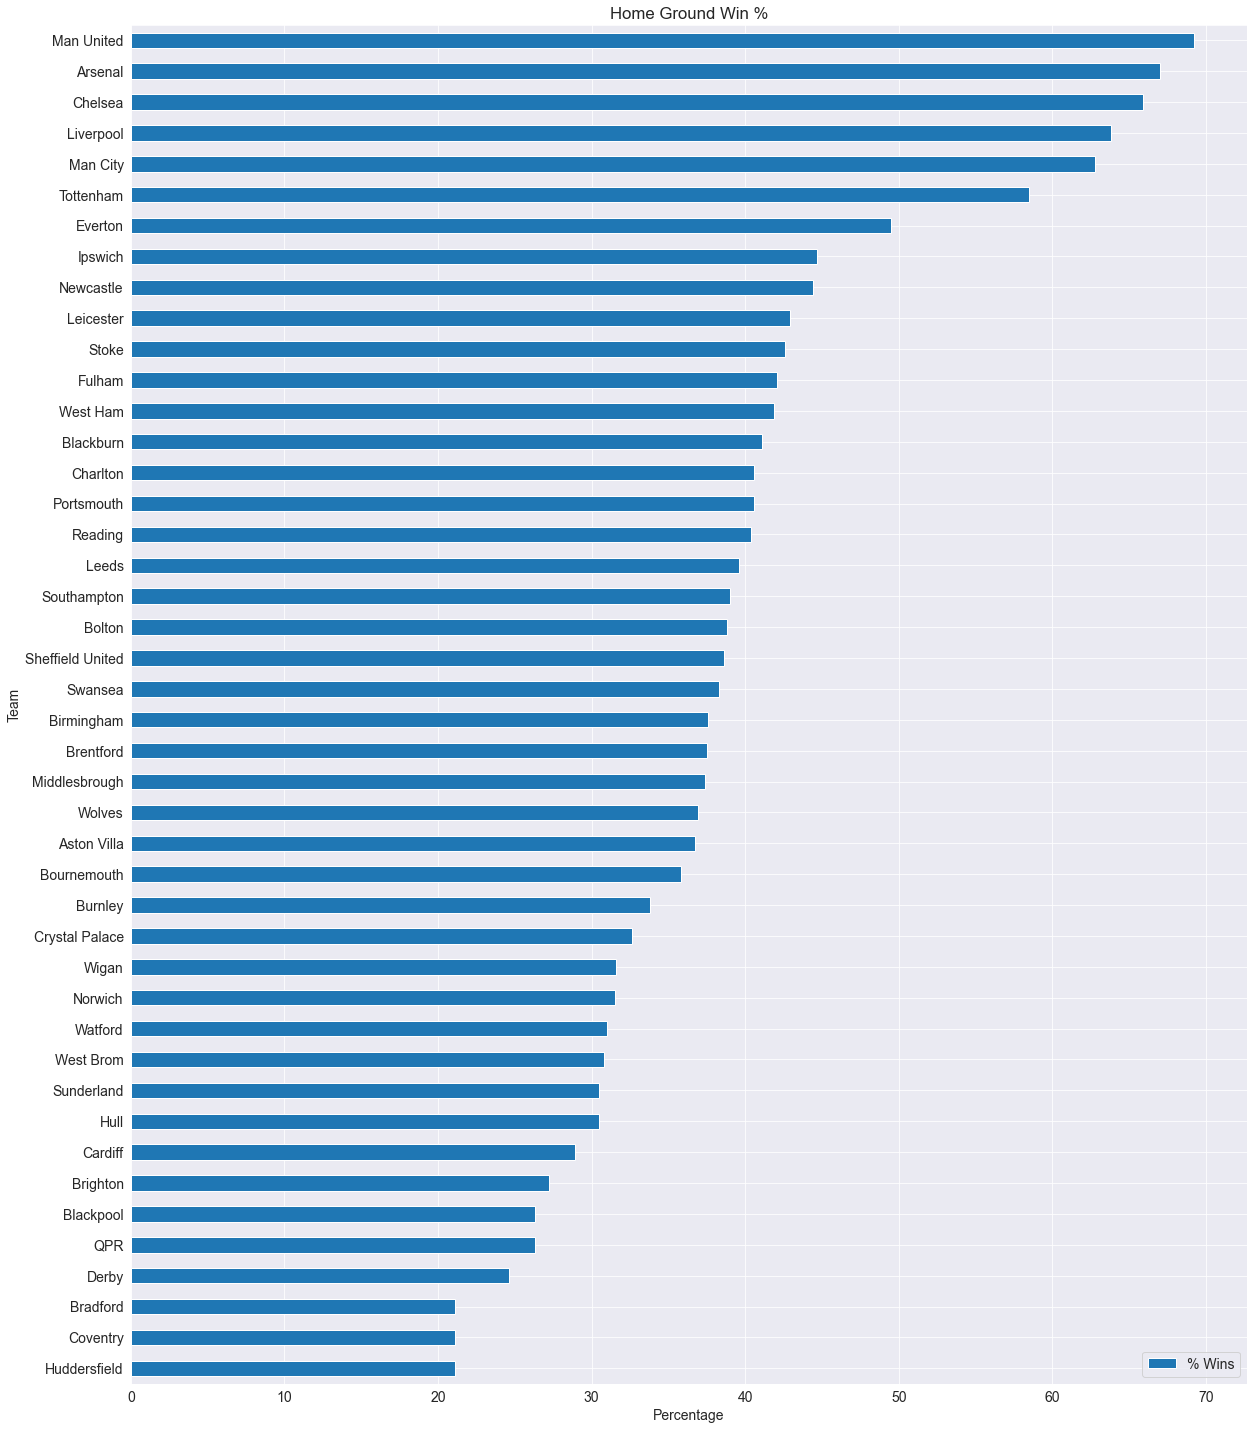

In [20]:

home_win.sort_values(ascending=True).plot(kind= 'barh')
plt.xlabel('Percentage')
plt.ylabel('Team')
plt.legend(['% Wins'])
plt.title("Home Ground Win %")
plt.style.use('seaborn-dark-palette')



this Shows the Teams with Highets Win % in the past 22 years of the premier league where man utd take 1st place

In [21]:
away_win=100*round((Prem_data.loc[Prem_data['FTR']=='A'].groupby('AwayTeam')['FTR'].count()/Prem_data.groupby('AwayTeam')['FTR'].count()),3)

away_win.sort_values(ascending = False)

AwayTeam
Man United          52.7
Chelsea             52.3
Liverpool           46.7
Arsenal             45.3
Man City            43.9
Leeds               37.8
Tottenham           35.4
Ipswich             31.6
Leicester           28.9
Crystal Palace      27.4
Everton             27.3
Blackpool           26.3
Blackburn           25.8
Aston Villa         25.7
Brentford           25.0
Southampton         24.9
Bolton              24.4
Wigan               24.3
West Ham            24.3
Wolves              23.5
Newcastle           23.3
Swansea             23.3
Charlton            23.3
Bournemouth         23.2
Coventry            21.1
Brighton            20.9
Watford             20.8
Burnley             20.3
Middlesbrough       18.9
Portsmouth          18.8
Stoke               18.4
Birmingham          17.3
Sunderland          17.3
West Brom           16.6
Cardiff             15.8
Reading             15.8
Sheffield United    15.8
Fulham              14.7
Hull                12.6
QPR             

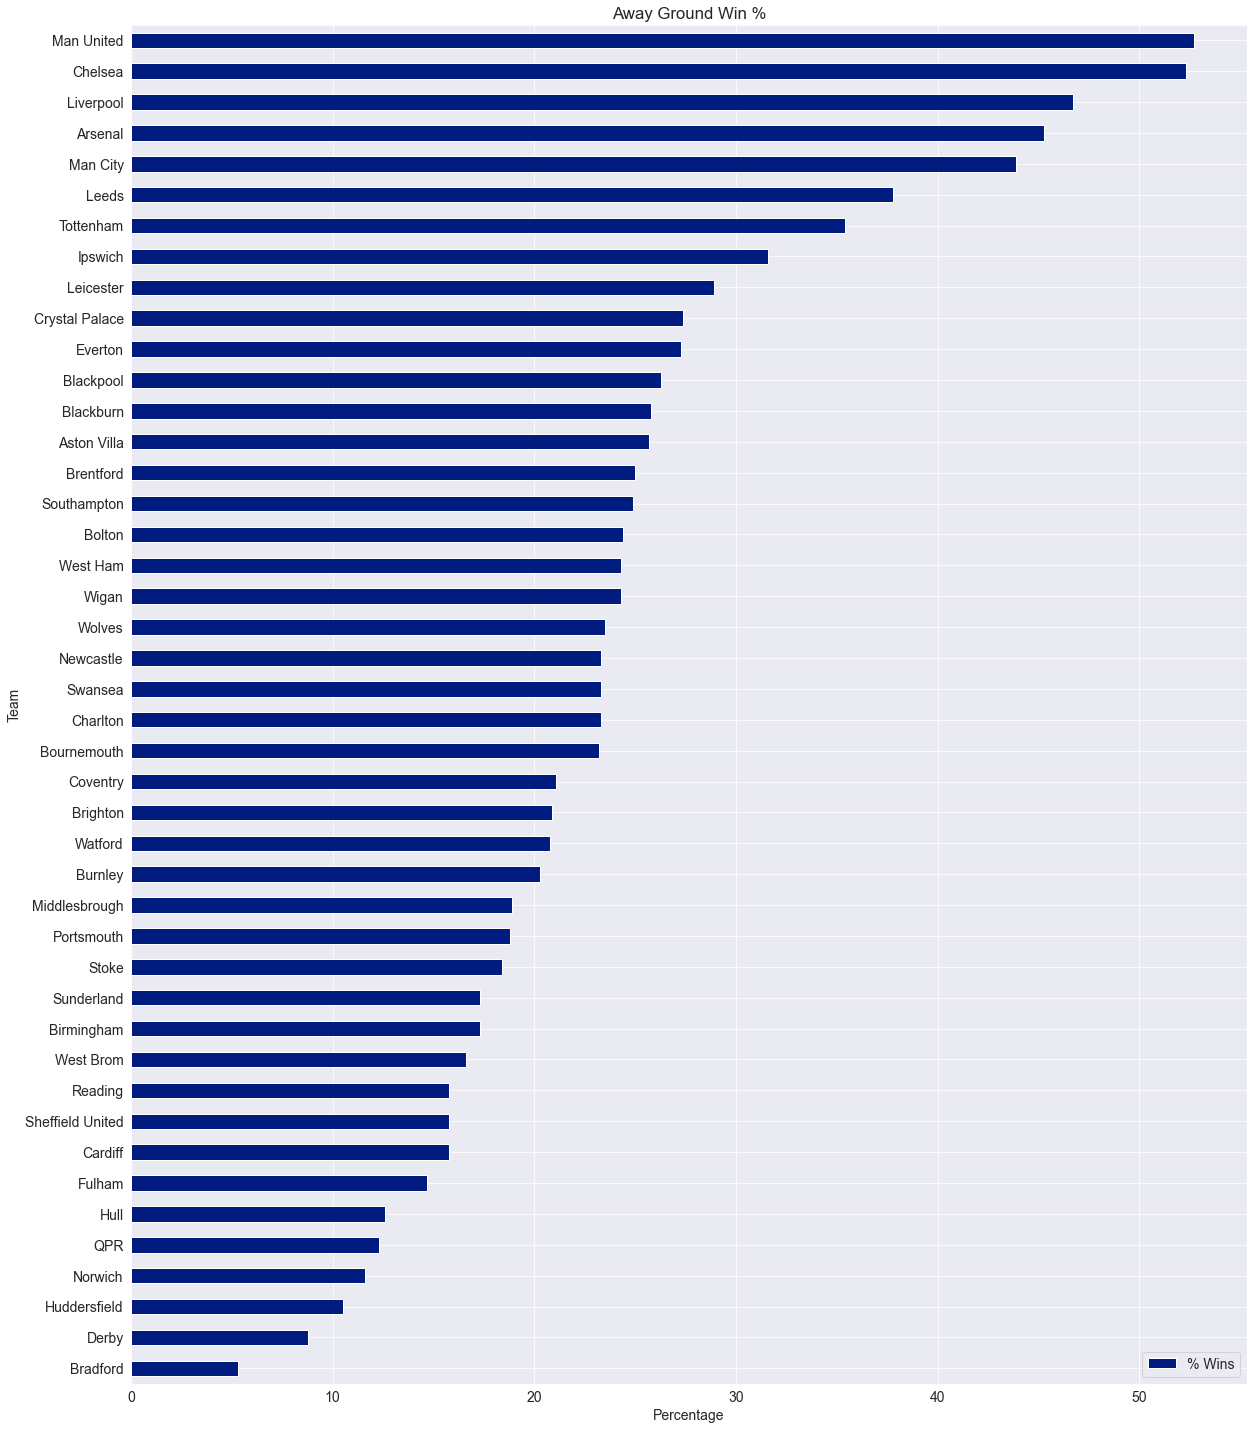

In [22]:
away_win.sort_values(ascending=True).plot(kind= 'barh')
plt.xlabel('Percentage')
plt.ylabel('Team')
plt.legend(['% Wins'])
plt.title("Away Ground Win %")
plt.style.use('seaborn-dark-palette')

this Shows the Teams with Highets Win % in the past 22 years of the premier league where man utd take 1st place 
while Braford Score the lowest.

In [23]:
HGPPlayed = Prem_data.groupby(['Season','HomeTeam'])['FTR'].count().rename("H_Played")
HGWins = Prem_data[Prem_data['FTR'] =='H'].groupby(['Season','HomeTeam'])['FTR'].count().rename("H_Wins")
HGLost = Prem_data[Prem_data['FTR'] =='A'].groupby(['Season','HomeTeam'])['FTR'].count().rename("H_Lost")
HGDraws = Prem_data[Prem_data['FTR'] =='D'].groupby(['Season','HomeTeam'])['FTR'].count().rename("H_Drawn")
home_games=pd.concat([HGPPlayed,HGWins,HGLost,HGDraws],axis=1).reset_index()
home_games.fillna(0,inplace=True)
home_games[['H_Played','H_Wins','H_Lost','H_Drawn']]=home_games[['H_Played','H_Wins','H_Lost','H_Drawn']].astype(int)

HGScores=Prem_data.groupby(['Season','HomeTeam'])['FTAG','FTHG'].sum().astype(int).reset_index()
HGScores.rename(columns={'FTHG':'HG For','FTAG':'HG Against'},inplace=True)

home_df=pd.merge(left=home_games,right=HGScores,on=['Season','HomeTeam'],how='left')
home_df


,Season,HomeTeam,H_Played,H_Wins,H_Lost,H_Drawn,HG Against,HG For
0,2000-01,Arsenal,19,15,1,3,13,45
1,2000-01,Aston Villa,19,8,3,8,20,27
2,2000-01,Bradford,19,4,8,7,29,20
3,2000-01,Charlton,19,11,3,5,19,31
4,2000-01,Chelsea,19,13,3,3,20,44
...,...,...,...,...,...,...,...,...
435,2021-22,Southampton,16,5,4,7,20,20
436,2021-22,Tottenham,15,10,4,1,17,31
437,2021-22,Watford,15,2,12,1,37,14
438,2021-22,West Ham,16,9,4,3,21,29


In [24]:
Away_played = Prem_data.groupby(['Season','AwayTeam'])['FTR'].count().rename("A_Played")
Away_Wins = Prem_data[Prem_data['FTR'] =='A'].groupby(['Season','AwayTeam'])['FTR'].count().rename("A_Wins")
Away_Lost = Prem_data[Prem_data['FTR'] =='H'].groupby(['Season','AwayTeam'])['FTR'].count().rename("A_Lost")
Away_Drawn = Prem_data[Prem_data['FTR'] =='D'].groupby(['Season','AwayTeam'])['FTR'].count().rename("A_Drawn")


away_games=pd.concat([Away_played,Away_Wins,Away_Lost,Away_Drawn],axis=1).reset_index()
away_games.fillna(0,inplace=True)   ##NaN comes where theere are 0 games as groupby misses that entry
away_games[['A_Played','A_Lost','A_Drawn','A_Wins']]=away_games[['A_Played','A_Lost','A_Drawn','A_Wins']].astype(int)

A_Score=Prem_data.groupby(['Season','AwayTeam'])['FTAG','FTHG'].sum().astype(int).reset_index()
A_Score.rename(columns={'FTHG':'AG Against','FTAG':'AG For'},inplace=True)

away_df=pd.merge(left=away_games,right=A_Score,on=['Season','AwayTeam'],how='left')
away_df


,Season,AwayTeam,A_Played,A_Wins,A_Lost,A_Drawn,AG For,AG Against
0,2000-01,Arsenal,19,5,7,7,18,25
1,2000-01,Aston Villa,19,5,7,7,19,23
2,2000-01,Bradford,19,1,14,4,10,41
3,2000-01,Charlton,19,3,11,5,19,38
4,2000-01,Chelsea,19,4,8,7,24,25
...,...,...,...,...,...,...,...,...
435,2021-22,Southampton,15,3,7,5,17,32
436,2021-22,Tottenham,16,8,6,2,25,20
437,2021-22,Watford,16,4,9,3,15,23
438,2021-22,West Ham,16,6,7,3,22,21


We Now Merge the 2 databases together and add the Points tally to it 

In [25]:
Points_tbl = pd.merge(left=home_df,right=away_df,left_on=['Season','HomeTeam'],right_on=['Season','AwayTeam']).drop(['AwayTeam'],axis=1)
Points_tbl.rename(columns={'HomeTeam':'Team'},inplace=True)
Points_tbl['Total Played'] = Points_tbl['H_Played'] + Points_tbl['A_Played']
Points_tbl['Total Wins'] = Points_tbl['H_Wins'] + Points_tbl['A_Wins']
Points_tbl['Total Loss'] = Points_tbl['H_Lost'] + Points_tbl['A_Lost']
Points_tbl['Total Draw'] = Points_tbl['H_Drawn'] + Points_tbl['A_Drawn']
Points_tbl['GF'] = Points_tbl['HG For'] + Points_tbl['AG For']
Points_tbl['GA'] = Points_tbl['HG Against'] + Points_tbl['AG Against']
Points_tbl['GD'] = Points_tbl['GF'] - Points_tbl['GA'] #goal difference
Points_tbl['Total_Points'] = 3*Points_tbl['Total Wins'] + Points_tbl['Total Draw']  # 3 Points for a Win and 1 Point for a Draw.


In [26]:
## Ranking the teams
Points_tbl['Rank']= Points_tbl.groupby('Season')['Total_Points'].rank(method='min',ascending=False)
Points_tbl['fin'] = Points_tbl.groupby(['Season','Rank'])['GD'].rank(method='first',ascending=False)  # If points are same, use goal difference
Points_tbl['Rank']=np.where((Points_tbl['fin'] > 1),(Points_tbl['Rank']+Points_tbl['fin'] - 1),Points_tbl['Rank'])
Points_tbl.drop('fin',axis=1,inplace=True)

#this shows the teams sorted by amount of Point in Acsending Order.
Points_tbl.sort_values(by='Rank')[['Season','Team','Total Played','Total Wins','Total Loss','Total Draw','GF','GA','GD','Total_Points','Rank']]

,Season,Team,Total Played,Total Wins,Total Loss,Total Draw,GF,GA,GD,Total_Points,Rank
130,2006-07,Man United,38,28,5,5,83,27,56,89,1.0
269,2013-14,Man City,38,27,6,5,102,37,65,86,1.0
86,2004-05,Chelsea,38,29,1,8,72,15,57,95,1.0
106,2005-06,Chelsea,38,29,5,4,72,22,50,91,1.0
306,2015-16,Leicester,38,23,3,12,68,36,32,81,1.0
...,...,...,...,...,...,...,...,...,...,...,...
193,2009-10,Portsmouth,38,7,24,7,34,66,-32,28,20.0
31,2001-02,Leicester,38,5,20,13,30,64,-34,28,20.0
146,2007-08,Derby,38,1,29,8,20,89,-69,11,20.0
115,2005-06,Sunderland,38,3,29,6,26,69,-43,15,20.0


In [27]:
pointa= Points_tbl.sort_values(by='Total_Points')[['Season','Team','Total Played','Total Wins','Total Loss','Total Draw','GF','GA','GD','Total_Points','Rank']]

In [28]:
head = pointa.tail(10)

Text(0, 0.5, 'Team')

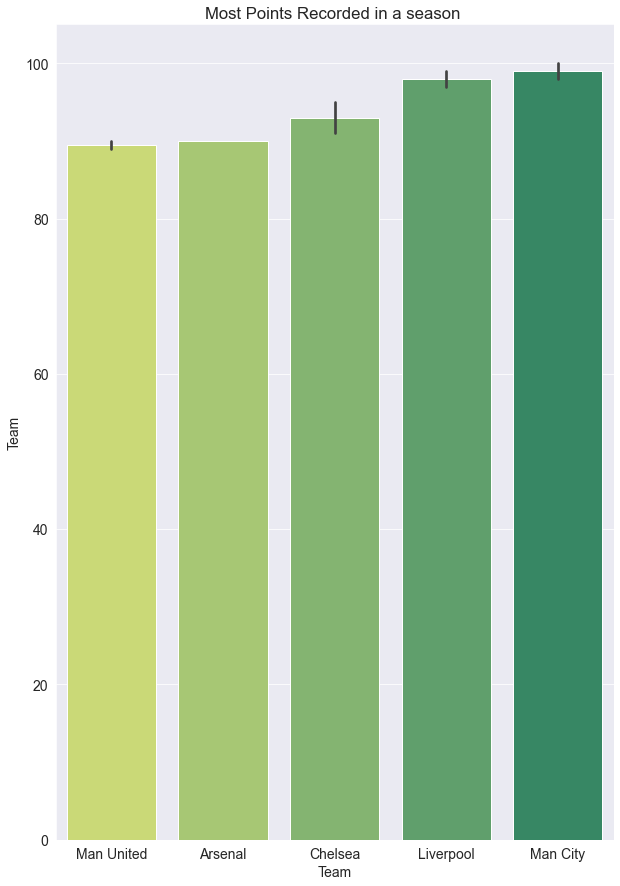

In [40]:
matplotlib.rcParams['figure.figsize'] = (10, 15)
sns.barplot(x= "Team",y= 'Total_Points', data = head , palette="summer_r")
plt.title('Most Points Recorded in a season ')
plt.ylabel('Team')

here Shows Which Team Scored the highest points tally ever in the past 20 year with man city being first at 100 points in the 2018-2019 Season

In [30]:
twentytwenty = Points_tbl[Points_tbl['Season']=='2020-21'].sort_values(by='Rank')[['Season','Team','Total Played','Total Wins','Total Loss','Total Draw','GF','GA','GD','Total_Points','Rank']]

Text(0, 0.5, 'Team')

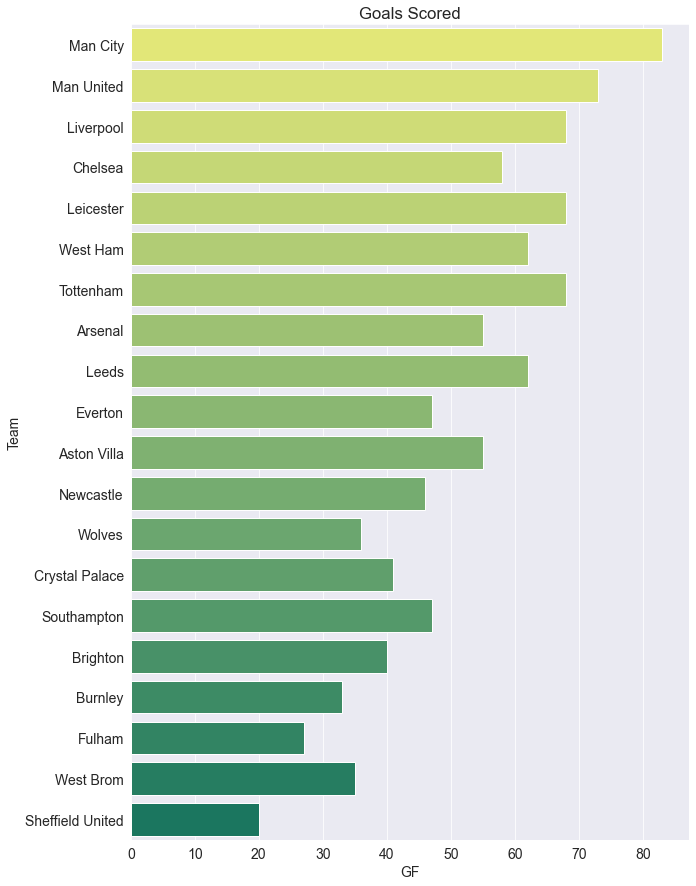

In [31]:
matplotlib.rcParams['figure.figsize'] = (10, 15)
sns.barplot("GF",'Team', data = twentytwenty , palette="summer_r")
plt.title('Goals Scored')
plt.ylabel('Team')

for Refrence we here show the Goals For the Teams in the 2020-2021 Season

In [32]:
twenty21 = Points_tbl[Points_tbl['Season']=='2021-22'].sort_values(by='Rank')[['Season','Team','Total Played','Total Wins','Total Loss','Total Draw','GF','GA','GD','Total_Points','Rank']]

Text(0, 0.5, 'Team')

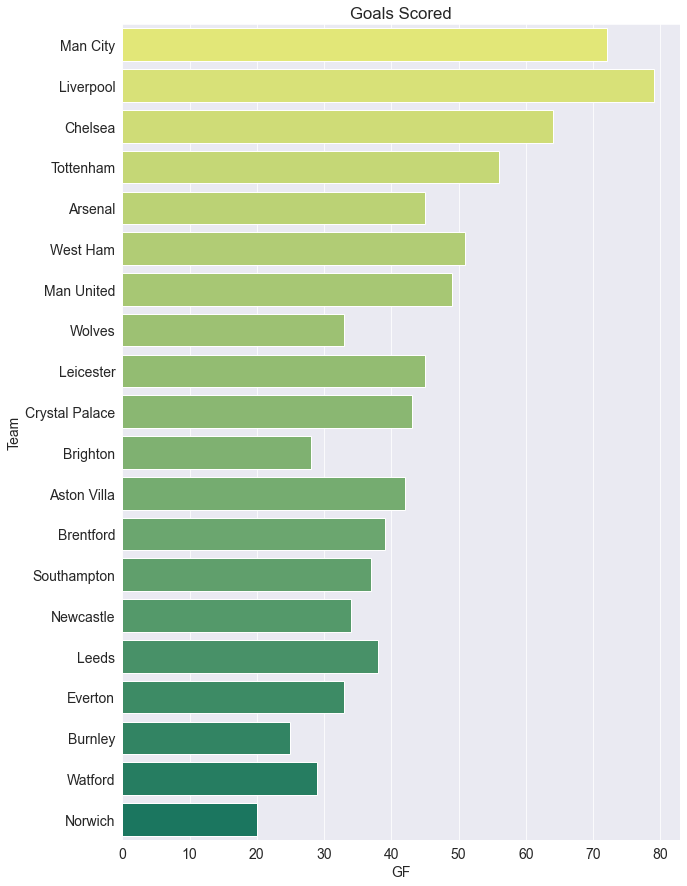

In [33]:
matplotlib.rcParams['figure.figsize'] = (10, 15)
sns.barplot("GF",'Team', data = twenty21 , palette="summer_r")
plt.title('Goals Scored')
plt.ylabel('Team')

This Shows the Goals Scored for the Teams in this Current Season (2022-2021) .... Not Yet Finished

In [34]:
ArsenalStats = Points_tbl[Points_tbl['Team']=='Arsenal'].sort_values(by='Rank')[['Season','Team','Total Played','Total Wins','Total Loss','Total Draw','GF','GA','GD','Total_Points','Rank']]

Text(0, 0.5, 'Season')

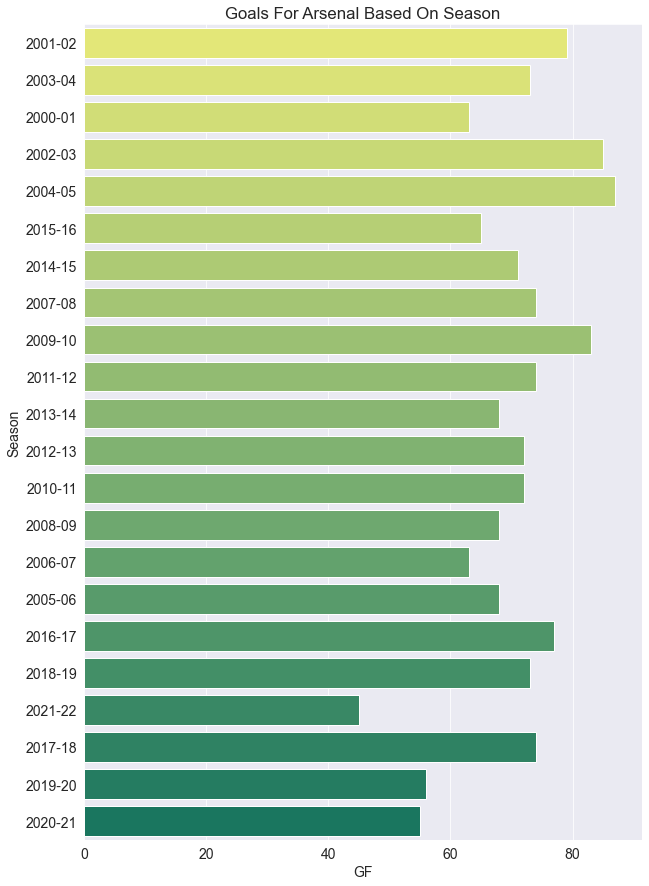

In [35]:
matplotlib.rcParams['figure.figsize'] = (10, 15)
sns.barplot("GF",'Season', data = ArsenalStats , palette="summer_r")
plt.title('Goals For Arsenal Based On Season')
plt.ylabel('Season')

Here Shows that Arsenal's Most Goals Scored Year Was in 2004-2005

Text(0, 0.5, 'Season')

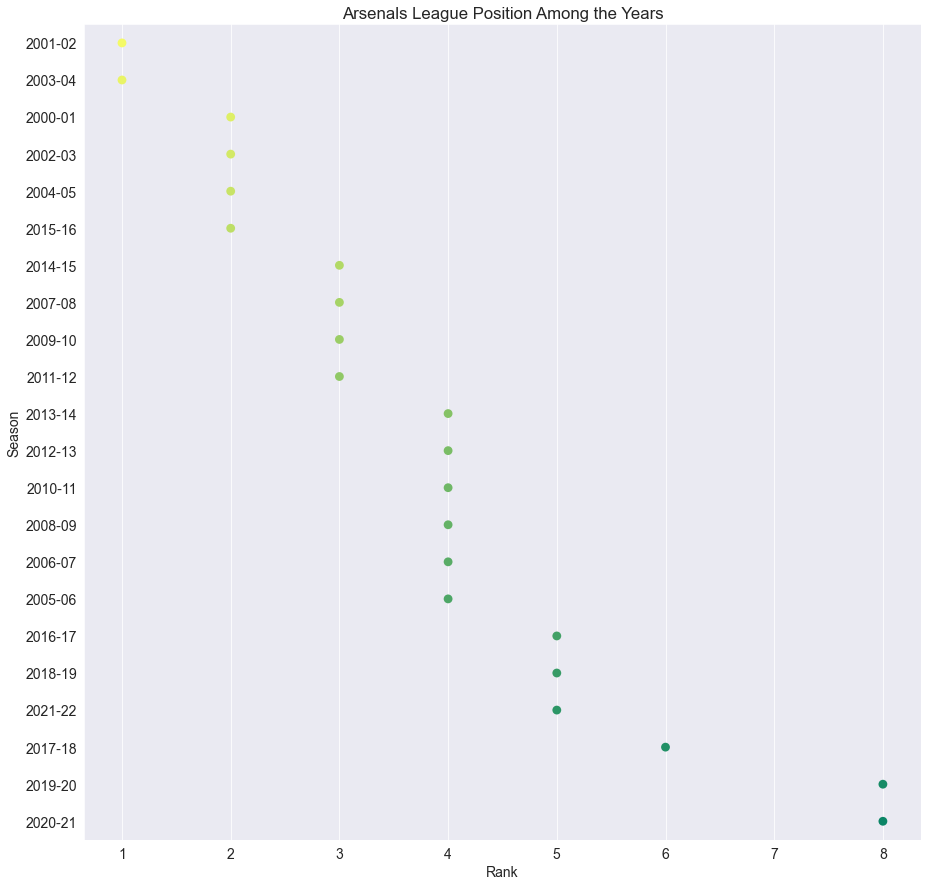

In [36]:
matplotlib.rcParams['figure.figsize'] = (15, 15)
sns.pointplot("Rank",'Season', data = ArsenalStats , palette="summer_r", kind="point")
plt.title('Arsenals League Position Among the Years')
plt.ylabel('Season')

This Shows Arsenals League Postions Over the Year 
- The Decline is shown from their best Positions to their lowers among the seasons


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

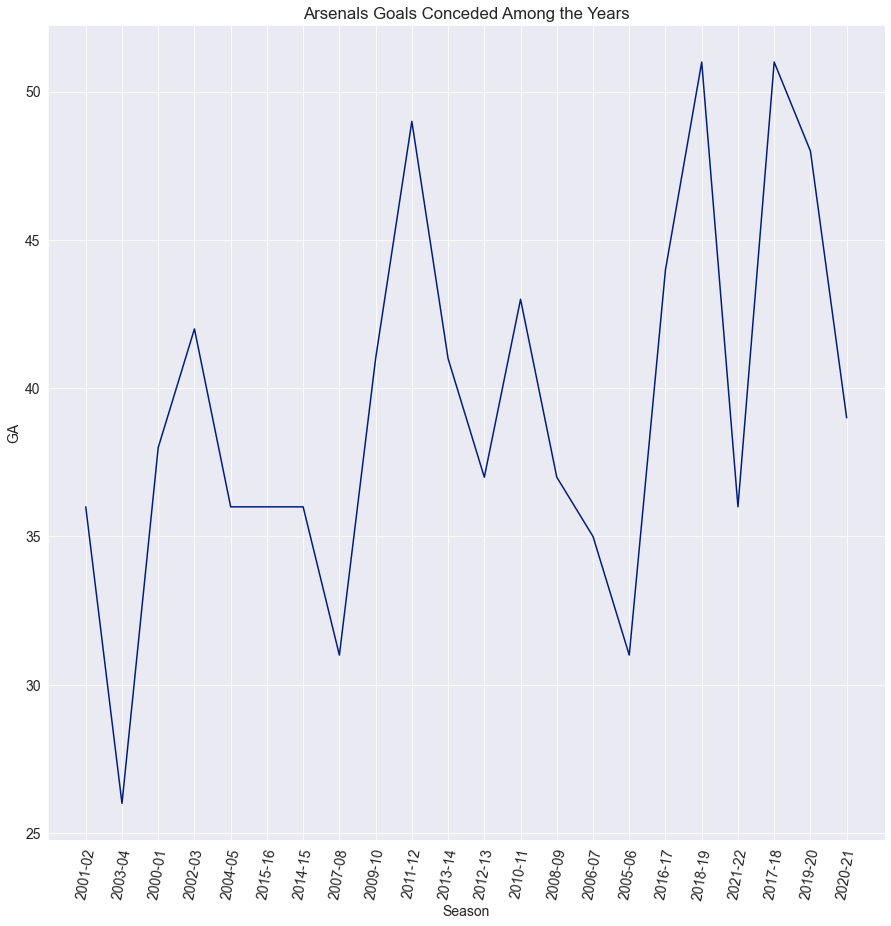

In [37]:
matplotlib.rcParams['figure.figsize'] = (15, 15)
sns.lineplot("Season",'GA', data = ArsenalStats , palette="summer_r")
plt.title('Arsenals Goals Conceded Among the Years')
plt.ylabel('GA')
plt.xticks(rotation=80)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

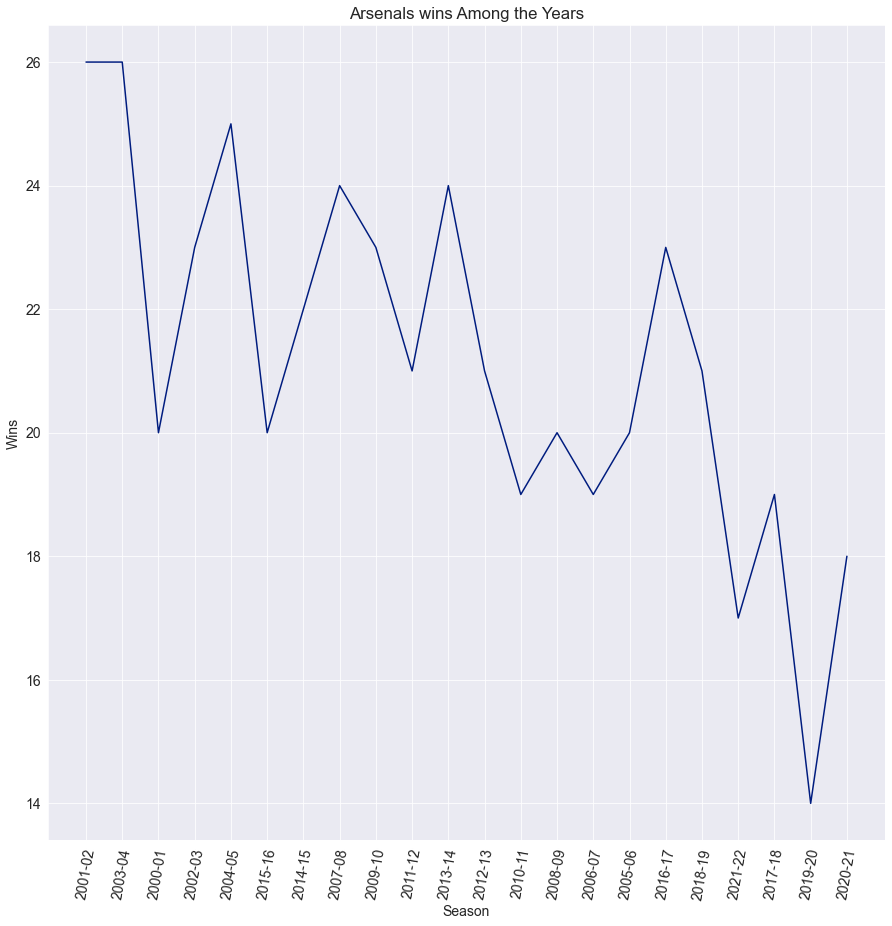

In [48]:
matplotlib.rcParams['figure.figsize'] = (15, 15)
sns.lineplot("Season",'Total Wins', data = ArsenalStats , palette="summer_r")
plt.title('Arsenals wins Among the Years')
plt.ylabel('Wins')
plt.xticks(rotation=80)